<a href="https://colab.research.google.com/github/mwang-cmn/Outlier-Detection---Geospatial-Analysis-of-Election-Data/blob/main/Nigerian_Elections_Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from geopy.geocoders import OpenCage

In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/Nigeria_Elections/'
data = pd.read_csv(path + "AKWA_IBOM_crosschecked.csv")
data.head()

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,Result_Sheet_Corrected,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File
0,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,-1,False,False,False,False,UNKNOWN,0,0,0,0,https://docs.inecelectionresults.net/elections...
1,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-003,"PRY SCH, IKOT OKU UBARA",190,833,True,-1,False,False,False,False,UNKNOWN,0,0,0,0,https://docs.inecelectionresults.net/elections...
2,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-005,"VILLAGE SQUARE, ATAI EDIENE",140,750,True,-1,False,False,False,False,UNKNOWN,8,21,30,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
3,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-006,PRY SCH IBANANG EDIENE,210,750,True,-1,False,False,False,False,UNKNOWN,105,45,43,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
4,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-007,"VILLAGE HALL, IKOT UDOUSUNG",131,542,True,-1,False,False,False,False,UNKNOWN,37,27,57,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3979 entries, 0 to 3978
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3979 non-null   object 
 1   LGA                     3979 non-null   object 
 2   Ward                    3979 non-null   object 
 3   PU-Code                 3979 non-null   object 
 4   PU-Name                 3979 non-null   object 
 5   Accredited_Voters       3979 non-null   int64  
 6   Registered_Voters       3979 non-null   int64  
 7   Results_Found           3979 non-null   bool   
 8   Transcription_Count     3979 non-null   int64  
 9   Result_Sheet_Stamped    3979 non-null   bool   
 10  Result_Sheet_Corrected  3979 non-null   bool   
 11  Result_Sheet_Invalid    3979 non-null   bool   
 12  Result_Sheet_Unclear    3979 non-null   bool   
 13  Result_Sheet_Unsigned   3979 non-null   object 
 14  APC                     3979 non-null   

In [5]:
data['Address'] = data['PU-Name'] + ',' + data['Ward'] + ',' + data['LGA'] + ',' + data['State']
data.head()

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,Result_Sheet_Corrected,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File,Address
0,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,-1,False,False,False,False,UNKNOWN,0,0,0,0,https://docs.inecelectionresults.net/elections...,"VILLAGE SQUARE, IKOT AKWA EBOM,ABAK URBAN 1,AB..."
1,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-003,"PRY SCH, IKOT OKU UBARA",190,833,True,-1,False,False,False,False,UNKNOWN,0,0,0,0,https://docs.inecelectionresults.net/elections...,"PRY SCH, IKOT OKU UBARA,ABAK URBAN 1,ABAK,AKWA..."
2,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-005,"VILLAGE SQUARE, ATAI EDIENE",140,750,True,-1,False,False,False,False,UNKNOWN,8,21,30,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,"VILLAGE SQUARE, ATAI EDIENE,ABAK URBAN 1,ABAK,..."
3,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-006,PRY SCH IBANANG EDIENE,210,750,True,-1,False,False,False,False,UNKNOWN,105,45,43,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,"PRY SCH IBANANG EDIENE,ABAK URBAN 1,ABAK,AKWA ..."
4,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-007,"VILLAGE HALL, IKOT UDOUSUNG",131,542,True,-1,False,False,False,False,UNKNOWN,37,27,57,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,"VILLAGE HALL, IKOT UDOUSUNG,ABAK URBAN 1,ABAK,..."


In [6]:
#Initialize Opencage with an API key
geolocator = OpenCage('dff859de4ca54bfea301d1bc0e410fb9')

In [7]:

def geocode_address(Address):
  try:
    location = geolocator.geocode(Address)
    return location.latitude, location.longitude
  except:
    return None, None

data[['Latitude', 'Longitude']] = data['Address'].apply(lambda x: pd.Series(geocode_address(x)))
data.head()

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File,Address,Latitude,Longitude
0,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-001,"VILLAGE SQUARE, IKOT AKWA EBOM",179,750,True,-1,False,...,False,UNKNOWN,0,0,0,0,https://docs.inecelectionresults.net/elections...,"VILLAGE SQUARE, IKOT AKWA EBOM,ABAK URBAN 1,AB...",6.21253,7.07231
1,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-003,"PRY SCH, IKOT OKU UBARA",190,833,True,-1,False,...,False,UNKNOWN,0,0,0,0,https://docs.inecelectionresults.net/elections...,"PRY SCH, IKOT OKU UBARA,ABAK URBAN 1,ABAK,AKWA...",6.21253,7.07231
2,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-005,"VILLAGE SQUARE, ATAI EDIENE",140,750,True,-1,False,...,False,UNKNOWN,8,21,30,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,"VILLAGE SQUARE, ATAI EDIENE,ABAK URBAN 1,ABAK,...",4.97970,7.79171
3,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-006,PRY SCH IBANANG EDIENE,210,750,True,-1,False,...,False,UNKNOWN,105,45,43,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,"PRY SCH IBANANG EDIENE,ABAK URBAN 1,ABAK,AKWA ...",4.97970,7.79171
4,AKWA IBOM,ABAK,ABAK URBAN 1,03-01-01-007,"VILLAGE HALL, IKOT UDOUSUNG",131,542,True,-1,False,...,False,UNKNOWN,37,27,57,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,"VILLAGE HALL, IKOT UDOUSUNG,ABAK URBAN 1,ABAK,...",4.97970,7.79171


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3979 entries, 0 to 3978
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3979 non-null   object 
 1   LGA                     3979 non-null   object 
 2   Ward                    3979 non-null   object 
 3   PU-Code                 3979 non-null   object 
 4   PU-Name                 3979 non-null   object 
 5   Accredited_Voters       3979 non-null   int64  
 6   Registered_Voters       3979 non-null   int64  
 7   Results_Found           3979 non-null   bool   
 8   Transcription_Count     3979 non-null   int64  
 9   Result_Sheet_Stamped    3979 non-null   bool   
 10  Result_Sheet_Corrected  3979 non-null   bool   
 11  Result_Sheet_Invalid    3979 non-null   bool   
 12  Result_Sheet_Unclear    3979 non-null   bool   
 13  Result_Sheet_Unsigned   3979 non-null   object 
 14  APC                     3979 non-null   

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
data[['Latitude', 'Longitude']] = imputer.fit_transform(data[['Latitude', 'Longitude']])
data.to_csv('AKWA_IBOM_geocode.csv', index = False)

In [13]:
files.download('AKWA_IBOM_geocode.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
#Calculate distance and find neighbours
from geopy.distance import geodesic
neighbours= {}
def neighbouring_pu(data, radius = 1.0):
  for i, row in data.iterrows():
    neighbours[i] = []
    for j, row2 in data.iterrows():
      if i != j:
        distance = geodesic((row['Latitude'],row['Longitude']), (row2['Latitude'],row2['Longitude'])).km
        if distance <= radius:
          neighbours[i].append(j)
  return neighbours

neighbours = neighbouring_pu(data, radius =1.0)

In [21]:

def get_outlier_scores(data, neighbours):
    """
    Calculate outlier scores for each row in the DataFrame based on the difference between
    the votes of the current row and the average votes of its neighbors.

    Parameters:
    data (pd.DataFrame): DataFrame containing vote counts for different parties.
    neighbours (dict): Dictionary where each key is a row index and the value is a list of indices
                       of its neighboring rows.

    Returns:
    pd.DataFrame: The original DataFrame concatenated with a new DataFrame containing outlier scores
                  for each party.
    """

    # Initialize an empty list to store the outlier scores for each row
    outlier_scores = []

    # List of parties for which outlier scores will be calculated
    parties = ['APC', 'LP', 'PDP', 'NNPP']

    # Iterate over each row in the DataFrame
    for i, row in data.iterrows():
        # Dictionary to store outlier scores for the current row
        scores = {}

        # Calculate outlier score for each party
        for party in parties:
            # Number of votes for the current party in the current row
            votes = row[party]
            # Average number of votes for the current party among the neighbors
            neighbour_votes = data.loc[neighbours[i], party].mean() if neighbours[i] else 0
            # Calculate the absolute difference between the current row's votes and the average neighbor votes
            scores[party + '_outlier_score'] = abs(votes - neighbour_votes)

        # Append the scores dictionary to the outlier_scores list
        outlier_scores.append(scores)

        # Create a DataFrame from the outlier_scores list
        outlier_scores_data = pd.DataFrame(outlier_scores)

    # Concatenate the original DataFrame with the outlier scores DataFrame
    return pd.concat([data, outlier_scores_data], axis=1)

# Example usage: calculate outlier scores for the data using the neighbors dictionary
outlier_scores_df = get_outlier_scores(data, neighbours)


In [22]:

outlier_scores_df.to_csv('AKWA_IBOM_outlier_scores.csv', index = False)
files.download('AKWA_IBOM_outlier_scores.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
parties = ['APC', 'LP', 'PDP', 'NNPP']
sorted_outliers = outlier_scores_df.sort_values(by = [party + '_outlier_score' for party in parties], ascending=False)
sorted_outliers.to_csv('AKWA_IBOM_sorted_outliers.csv', index = False)
files.download('AKWA_IBOM_sorted_outliers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# Create a report
report = ""
for party in parties:
  top_outliers = sorted_outliers[['PU-Code', party, party+'_outlier_score']].head(5)
  report += f"\n####: {party}\n"
  report += top_outliers.to_markdown(index=False)

with open('report.md', 'w') as f:
    f.write(report)
#Download report
files.download('report.md')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

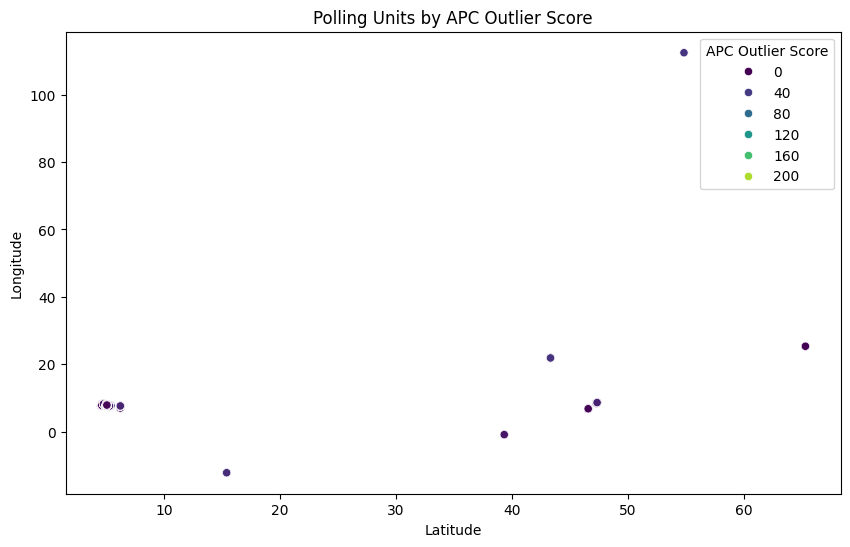

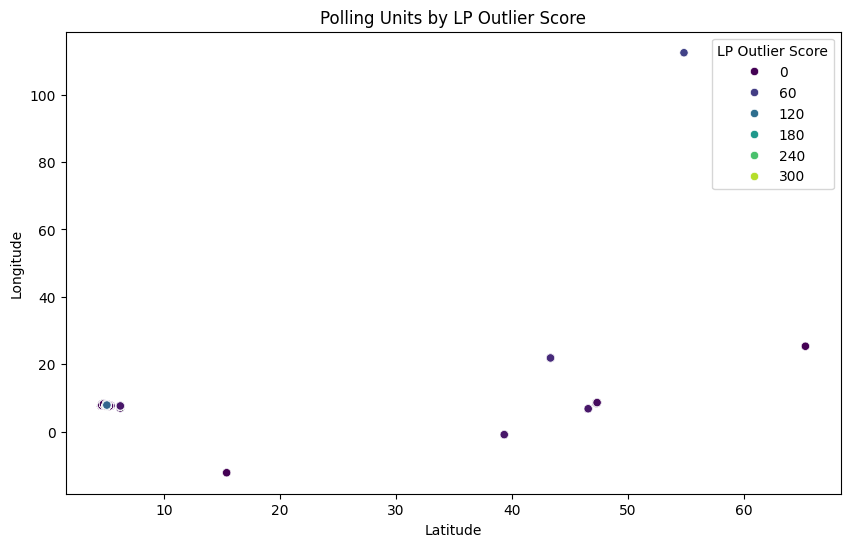

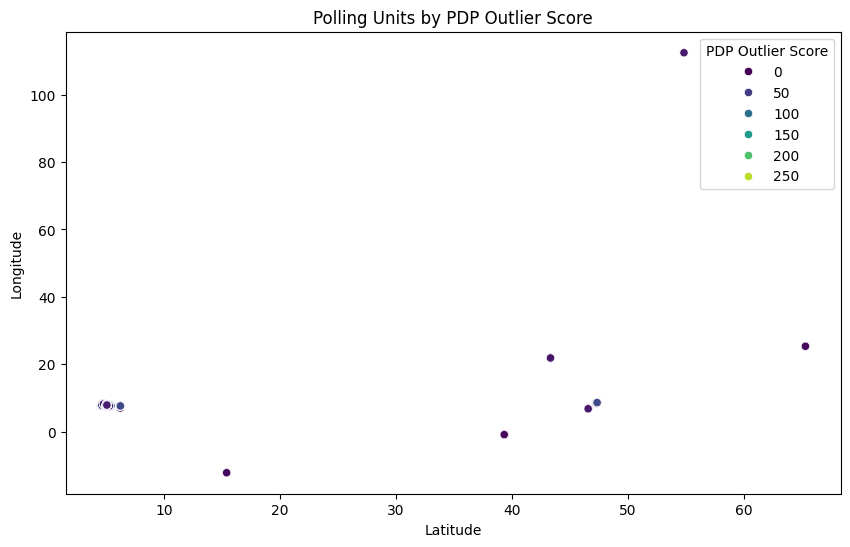

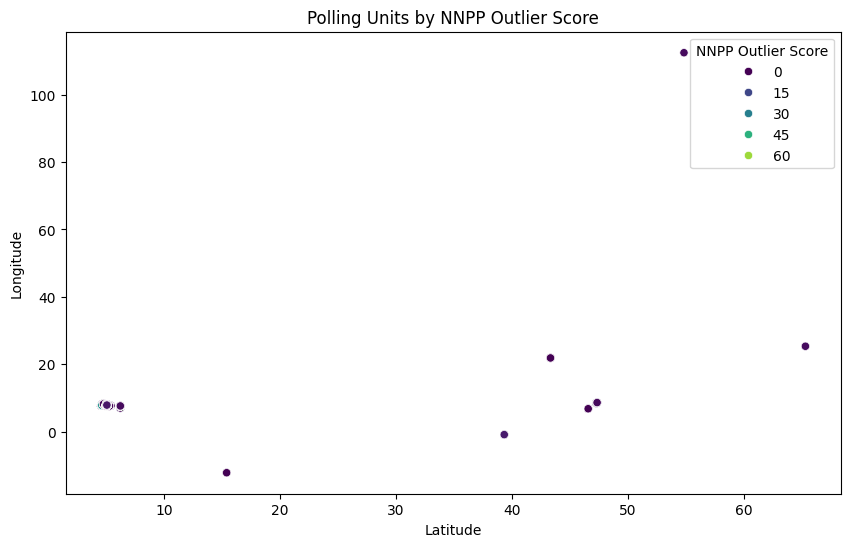

In [27]:
# List of parties for which plots will be generated
parties = ['APC', 'LP', 'PDP', 'NNPP']
for party in parties:
  plt.figure(figsize=(10, 6))
  sns.scatterplot(data=outlier_scores_df, x='Latitude', y='Longitude', hue=party + '_outlier_score', palette='viridis')
  plt.title(f'Polling Units by {party} Outlier Score')
  plt.xlabel('Latitude')
  plt.ylabel('Longitude')
  plt.legend(title=party + ' Outlier Score')
  plt.savefig(f'polling_units_{party}_outlier_score.png')
  plt.show()